## Algorytmy genetyczne

### Optymalizacja prawie "bez ograniczeń"

Podstawowymi pojęciami w algorytmach genetycznych są chromosomy, generacje/pokolenia, krzyżowanie i mutacje.

Każdy chromosomy ma pewną ilość genów, czyli tzw. wartości (w najprostszej postaci będą to argumenty funkcji, którą optymalizujemy).

Początkowo generujemy pokolenie chromosomy zawierające wartości z danego przedziału poszukiwań ($[x_{min},x_{max}]$).

Następnie wyznaczamy dla nich wartości funkcji, którą chcemy zoptymalizować i wybieramy k najlepszych chromosomów, które posłużą nam do wygenerowania nowego pokolenia.

Wybieramy losowe 2 osobniki (jeden o wektorze genów $x$, a drugi o wektorze genów $y$) i dokonujemy krzyżowania w następujący sposób:
1. Dla i od wartości 0 do liczby genów dokonujemy wygenerowania i-tgo genu w następujący sposób:
    - Losujemy wartość $r$ z przedziału $[0,1]$.
    - Wyznaczmy wartość: $c_i=r*x_i+(1-r)*y_i$
2. Zwracamy nowy wektor cech $c$.

Po wygenerowaniu chromosomu nowego pokolenia dla każdego jego genu losujemy liczbę i dla spełnionego warunku dokonujemy mutacji (ważne, żeby warunek był stosunkowo rzadko spełniony np. losujemy liczby z przedziału [0,1] i sprawdzamy, czy liczba jest mniejsza od 0,05). Możemy dokonać mutacji w następujący sposób dla i-tego genu o wartości $x_i$:
1. $\alpha = (1 - \frac{j - 1}{G})^\beta$, gdzie $\beta$ jest z góry ustalonym parametrem, np. 1, $j$ to numer konkretnego pokolenia, $G$ to całkowita ilość pokoleń.
2. Jeżeli  $r > x_i$, to: $x_i = x_{min} + (r - x_{min})^{\alpha}(x_i - x_{min})^{1-\alpha}$
3. W przeciwnym wypadku: $x_i = x_{max} - (x_{max} - r)^{\alpha}(x_{max} - x_i)^{1-\alpha}$

Krzyżowania dokonujemy tyle razy, aby wygenerować całe nowe pokolenie, dla którego obliczmy wartości funkcji i wybieramy kolejne $k$ najlepszych chromosomów. Operacje powtarzamy, aż wygenerujemy $G$ pokoleń.

### Zadanie 1 - Optymalizacja genetyczna (2 pkt)
Znajdź maksimum not_so_secret_function na obszarze $\Omega=[-3,4]^2$ implementując algorytm genetyczny dla 50 pokoleń i rozmiaru populacji 30. Narysuj także wykres średniej wartości funkcji dla każdego chromosomu z pokolenia od numeru pokolenia.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [122]:
def not_so_secret_function(x):
    return -(1 / 2 * x[0] ** 2 - 1 / 4 * x[1] ** 2 + 3) * np.log(1e-5 +(2 * x[0] + 1 - np.exp(x[1]))**2)

In [126]:
## PISZ TUTAJ

Text(0.5, 1.0, 'Mean generation function value')

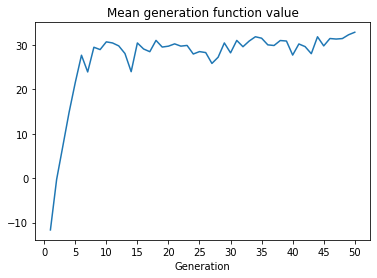

In [131]:
## PISZ TUTAJ

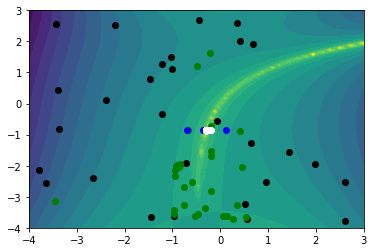

In [132]:
x = np.linspace(-4,3,100)
y = np.linspace(-4,3,100)
xx,yy = np.meshgrid(x,y)
z = not_so_secret_function(np.array([xx,yy]))
plt.contourf(xx,yy,z, levels=20)
plt.plot(history[0][:,0],history[0][:,1], 'o', c='k') # biały
plt.plot(history[1][:,0],history[1][:,1], 'o', c='g') # zielony
plt.plot(history[-10][:,0],history[-10][:,1], 'o', c='b') # niebieski
plt.plot(history[-1][:,0],history[-1][:,1], 'o', c='w') # czarny

## Zadanie 2 - Optymalizacja z ograniczeniami (2 pkt)

Zamiast wyznaczać "score", który wskazuje, które punkty są najlepsze, bezpośrednio za pomocą optymalizowanej funkcji, możemy sobie stworzyć tzw. fitness function, które będzie uwzględniało ograniczenia. Oznaczmy optymalizowaną funkcję jak $goal$, fitness function jako $f$, a ograniczenia jako $g_i$ (przy czym punkt $x$ ma spełniać warunek $g_i(x)\leq 0$).

Funkcję fitness możemy zdefiniować następująco:

$$f(x)=\begin{cases}
goal(x), & \text{ jeżeli } g(x) = 0 \\
goal_{max} + g(x), & \text{ w przeciwnym wypadku }
 \end{cases}$$

gdzie $g(x):=max(0,g_1(x),g_2(x),...)$, $goal_{max}$ to największa wartość funkcji w danym pokoleniu dla punktów $x$ spełniających $g(x)=0$.

Twoim zadaniem jest rozwiązanie problemu z poprzedniego zadania z ograniczeniem $x_2\geq x_1+1$.

In [216]:
## PISZ TUTAJ

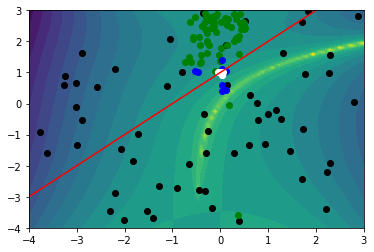

In [219]:
x = np.linspace(-4,3,100)
y = np.linspace(-4,3,100)
xx,yy = np.meshgrid(x,y)
z = not_so_secret_function(np.array([xx,yy]))
plt.contourf(xx,yy,z, levels=20)
plt.plot(history[0][:,0],history[0][:,1], 'o', c='k')
plt.plot(history[1][:,0],history[1][:,1], 'o', c='g')
plt.plot(history[-10][:,0],history[-10][:,1], 'o', c='b')
plt.plot(history[-1][:,0],history[-1][:,1], 'o', c='w')
plt.plot([-4,2],[-3,3],c="r")

## Zadanie 3 - PyGAD (2 pkt)

Użyj biblioteki PyGAD ([https://pygad.readthedocs.io/en/latest/index.html](https://pygad.readthedocs.io/en/latest/index.html)), aby rozwiązać problem z pierwszego zadania.